In [1]:
import pandas as pd

In [2]:
list_facil = pd.read_csv("fasilitas.csv")
list_facil = list_facil
list_facil

,name
0,InDOnesia CARE
1,tiket CLEAN
2,Kolam Renang
3,WiFi
4,Parkir
5,Restoran
6,Resepsionis 24 Jam
7,Lift
8,AC
9,Pusat Kebugaran


In [3]:
rating = [1, 0.571428571428571, 0.85, 0.942857142857143, 0.857142857142857, 0.707142857142857, 0.857142857142857, 0.921428571428571, 0.985714285714286, 0.65, 0.7, 0.657142857142857, 0.8, 0.528571428571429, 0.55]
id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list_facil['rating'] = rating
list_facil['id'] = id

list_facil


,name,rating,id
0,InDOnesia CARE,1.000000,1
1,tiket CLEAN,0.571429,2
2,Kolam Renang,0.850000,3
3,WiFi,0.942857,4
4,Parkir,0.857143,5
5,Restoran,0.707143,6
6,Resepsionis 24 Jam,0.857143,7
7,Lift,0.921429,8
8,AC,0.985714,9
9,Pusat Kebugaran,0.650000,10


In [4]:
df_facil = pd.read_csv("db_all_facilities.csv")
df_facil

,facilitiesid,hotelid
0,4,1
1,5,1
2,6,1
3,7,1
4,8,1
...,...,...
10399,7,2027
10400,9,2027
10401,4,2028
10402,5,2028


In [5]:
df_hotel = pd.read_csv("db_all_hotel.csv")
# df_hotel

df_hotel_summarized = df_hotel[["id", "Hotel Name", "Hotel Rating", "Min", "Max"]]
# df_hotel_summarized

In [6]:
import numpy as np

df_hotel_summarized['facil_rate'] = np.full(
  shape=2028,
  fill_value=3,
  dtype=np.float32
)

# df_hotel_summarized

C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\3460730437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_summarized['facil_rate'] = np.full(


In [7]:
rating_new = [1, 0.571428571428571, 0.85, 0.942857142857143, 0.857142857142857, 0.707142857142857, 0.857142857142857, 0.921428571428571, 0.985714285714286, 0.65, 0.7, 0.657142857142857, 0.8, 0.528571428571429, 0.55]
rating_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

hotel_id = 1
idx_count = 0
k=0

while hotel_id <= 2028:
    idx = []
    sum = 0
    for i in (df_facil['hotelid']):
        if i == hotel_id:
            idx.append(idx_count)
            idx_count+=1
        else:
            continue
    for j in (idx):
       for k in (rating_pos):
        if df_facil['facilitiesid'][j] == k:
            sum = sum + rating_new[k-1]
    df_hotel_summarized.loc[df_hotel_summarized['id'] == hotel_id, 'facil_rate'] = sum
    hotel_id += 1

In [8]:
## Normalisasi harga minimum dan maximum hotel
df_hotel_price_normalized = df_hotel_summarized

df_hotel_price_normalized["Min"] = (df_hotel_price_normalized["Min"] - df_hotel_price_normalized["Min"].min()) / (df_hotel_price_normalized["Min"].max() - df_hotel_price_normalized["Min"].min())
df_hotel_price_normalized["Max"] = (df_hotel_price_normalized["Max"] - df_hotel_price_normalized["Max"].min()) / (df_hotel_price_normalized["Max"].max() - df_hotel_price_normalized["Max"].min())

C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\3745509354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_price_normalized["Min"] = (df_hotel_price_normalized["Min"] - df_hotel_price_normalized["Min"].min()) / (df_hotel_price_normalized["Min"].max() - df_hotel_price_normalized["Min"].min())
C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\3745509354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_price_normalized["Max"] = (df_hotel_price_normalized["Max"] - df_hotel_price_norma

In [9]:
df_hotel_price_normalized

,id,Hotel Name,Hotel Rating,Min,Max,facil_rate
0,1,MaxoneHotels at Dharmahusada Surabaya,4.3,0.065456,0.184458,5.928571
1,2,D Carol Hotel Surabaya,4.2,0.031946,0.029027,6.928571
2,3,Choice City Hotel,4.4,0.048134,0.054369,7.500000
3,4,G Suites Hotel By AMITHYA,4.0,0.063891,0.370252,10.500000
4,5,Royal Regantris Cendana formerly Royal Singosa...,4.3,0.074035,0.193060,9.000000
...,...,...,...,...,...,...
2023,2024,RedDoorz Syariah near Sentani City Square,3.6,0.059044,0.045215,4.214286
2024,2025,RedDoorz @ Cigombong,3.0,0.053919,0.041224,3.357143
2025,2026,Unity RoomRent,4.5,0.043818,0.033356,4.914286
2026,2027,RedDoorz @ Jalan Gelanggang Remaja Waena Jayapura,Belum ada rating,0.033268,0.031142,4.214286


In [10]:
index = 0
while index < len(df_hotel_price_normalized["Hotel Rating"]):
    if df_hotel_price_normalized["Hotel Rating"][index] == "Belum ada rating":
        df_hotel_price_normalized["Hotel Rating"][index] = "0.0"
    # print(index)
    index = index + 1


df_hotel_price_normalized

C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\699980836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_price_normalized["Hotel Rating"][index] = "0.0"


,id,Hotel Name,Hotel Rating,Min,Max,facil_rate
0,1,MaxoneHotels at Dharmahusada Surabaya,4.3,0.065456,0.184458,5.928571
1,2,D Carol Hotel Surabaya,4.2,0.031946,0.029027,6.928571
2,3,Choice City Hotel,4.4,0.048134,0.054369,7.500000
3,4,G Suites Hotel By AMITHYA,4.0,0.063891,0.370252,10.500000
4,5,Royal Regantris Cendana formerly Royal Singosa...,4.3,0.074035,0.193060,9.000000
...,...,...,...,...,...,...
2023,2024,RedDoorz Syariah near Sentani City Square,3.6,0.059044,0.045215,4.214286
2024,2025,RedDoorz @ Cigombong,3.0,0.053919,0.041224,3.357143
2025,2026,Unity RoomRent,4.5,0.043818,0.033356,4.914286
2026,2027,RedDoorz @ Jalan Gelanggang Remaja Waena Jayapura,0.0,0.033268,0.031142,4.214286


In [11]:
df_final_data = df_hotel_price_normalized[['id','Hotel Rating', 'Min', 'Max', 'facil_rate']]
df_final_data

,id,Hotel Rating,Min,Max,facil_rate
0,1,4.3,0.065456,0.184458,5.928571
1,2,4.2,0.031946,0.029027,6.928571
2,3,4.4,0.048134,0.054369,7.500000
3,4,4.0,0.063891,0.370252,10.500000
4,5,4.3,0.074035,0.193060,9.000000
...,...,...,...,...,...
2023,2024,3.6,0.059044,0.045215,4.214286
2024,2025,3.0,0.053919,0.041224,3.357143
2025,2026,4.5,0.043818,0.033356,4.914286
2026,2027,0.0,0.033268,0.031142,4.214286


In [12]:
#Normalisasi Rating Hotel
index_rate = 0
for rate in (df_final_data["Hotel Rating"]): 
    df_final_data["Hotel Rating"][index_rate] = float(rate)
    index_rate+=1

df_final_data["Hotel Rating"] = (df_final_data["Hotel Rating"] - df_final_data["Hotel Rating"].min()) / (df_final_data["Hotel Rating"].max() - df_final_data["Hotel Rating"].min())

#Normalisasi Rating Fasilitas
df_final_data["facil_rate"] = (df_final_data["facil_rate"] - df_final_data["facil_rate"].min()) / (df_final_data["facil_rate"].max() - df_final_data["facil_rate"].min())

df_final_data

C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\4250749375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_data["Hotel Rating"][index_rate] = float(rate)
C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\4250749375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_data["Hotel Rating"] = (df_final_data["Hotel Rating"] - df_final_data["Hotel Rating"].min()) / (df_final_data["Hotel Rating"].max() - df_final_data["Hotel Rating"].min())
C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\4250749375.py:10: SettingWithCopyWarning: 
A value is try

,id,Hotel Rating,Min,Max,facil_rate
0,1,0.86,0.065456,0.184458,0.564626
1,2,0.84,0.031946,0.029027,0.659864
2,3,0.88,0.048134,0.054369,0.714286
3,4,0.8,0.063891,0.370252,1.000000
4,5,0.86,0.074035,0.193060,0.857143
...,...,...,...,...,...
2023,2024,0.72,0.059044,0.045215,0.401361
2024,2025,0.6,0.053919,0.041224,0.319728
2025,2026,0.9,0.043818,0.033356,0.468027
2026,2027,0.0,0.033268,0.031142,0.401361


In [13]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
df_final_data_finals = df_final_data[['Hotel Rating', 'facil_rate']]
df_final_data_finals.info

<bound method DataFrame.info of      Hotel Rating  facil_rate
0            0.86    0.564626
1            0.84    0.659864
2            0.88    0.714286
3             0.8    1.000000
4            0.86    0.857143
...           ...         ...
2023         0.72    0.401361
2024          0.6    0.319728
2025          0.9    0.468027
2026          0.0    0.401361
2027          0.0    0.253061

[2028 rows x 2 columns]>

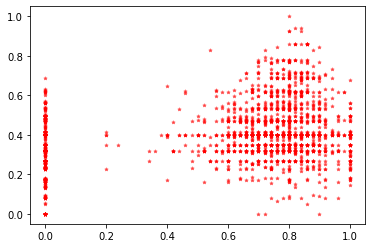

In [15]:
plt.scatter(x = df_final_data_finals['Hotel Rating'], y = df_final_data_finals['facil_rate'], s=10, c = "red", marker = "*", alpha = 0.5)
plt.show()

In [16]:
df_final_data_finals_x = df_final_data_finals.iloc[:, 0:2]
df_final_data_finals_x.head()

,Hotel Rating,facil_rate
0,0.86,0.564626
1,0.84,0.659864
2,0.88,0.714286
3,0.8,1.000000
4,0.86,0.857143


In [17]:
x_array = np.array(df_final_data_finals_x)
print(x_array)

[[0.86 0.5646258592605591]
 [0.8400000000000001 0.6598639488220215]
 [0.8800000000000001 0.7142857313156128]
 ...
 [0.9 0.4680272042751312]
 [0.0 0.40136057138442993]
 [0.0 0.2530612349510193]]


In [18]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.86      , 0.56462586],
       [0.84      , 0.65986395],
       [0.88      , 0.71428573],
       ...,
       [0.9       , 0.4680272 ],
       [0.        , 0.40136057],
       [0.        , 0.25306123]])

In [19]:
#yang diutak atik, jumlah cluster

kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
kmeans.fit(x_scaled)

print(kmeans.cluster_centers_)

[[0.82423592 0.2837063 ]
 [0.00122699 0.17663704]
 [0.79277567 0.680448  ]
 [0.63798246 0.39774586]
 [0.84529167 0.44536566]
 [0.00354949 0.41209864]]


C:\Users\ridlo\AppData\Local\Temp\ipykernel_18804\1476378265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_data_finals['cluster'] = kmeans.labels_


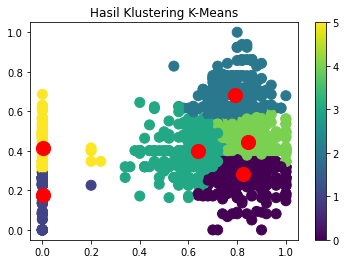

In [20]:
df_final_data_finals['cluster'] = kmeans.labels_

output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df_final_data_finals.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [33]:
# hasil clustering extract koordinat x,y, titik dengan centroid nya, dan label dari koordinat centroidnya
# klasifikasi dengan svm dan jadi modelnya.

df_final_data_finals['koor_x'] = x_scaled[:,0]
df_final_data_finals['koor_y'] = x_scaled[:,1]

# df_final_data_finals


,id,Hotel Image,Hotel Name,Tipe Properti,City,Address,Hotel Rating,Min,Max,Lattitute,Longitude
0,1,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,MaxoneHotels at Dharmahusada Surabaya,Hotel,Gubeng Surabaya,Jl. Dharmahusada No.189. Mojo. Gubeng. Kota SB...,4.3,350250,1148820,-7.267435,112.771124
1,2,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,D Carol Hotel Surabaya,Hotel,Bubutan Surabaya,Jl. Gundih No. 8. Gundih. Kec. Bubutan. Kota S...,4.2,195000,224250,-7.247228,112.729460
2,3,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,Choice City Hotel,Hotel,Bubutan Surabaya,Bubutan. Surabaya City. East Java 60174. Indon...,4.4,269997,374996,-7.255990,112.733686
3,4,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,G Suites Hotel By AMITHYA,Hotel,Gubeng Surabaya,Jl. Raya Gubeng No.43. Gubeng. Kec. Gubeng. Ko...,4.0,343000,2254000,-7.273623,112.747475
4,5,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,Royal Regantris Cendana formerly Royal Singosa...,Hotel,Tegalsari Surabaya,Jl. Kombes Pol. Moh. Duryat No.6. Tegalsari. K...,4.3,389996,1199988,-7.268379,112.739621
...,...,...,...,...,...,...,...,...,...,...,...
2023,2024,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,RedDoorz Syariah near Sentani City Square,Guest House,Sentani Timur Jayapura,CFVW+7CF. Hinekombe. Sentani. Jayapura Regency...,3.6,320544,320544,-2.557188,140.496083
2024,2025,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,RedDoorz @ Cigombong,Hotel,Abepura Jayapura,Lapangan. Jl. Perkutut. Vim. Abepura. Kota Jay...,3.0,296800,296800,-2.599163,140.671060
2025,2026,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,Unity RoomRent,Hotel,Abepura Jayapura,Jl. Pantai Enggros. samping gereja El-Shadai,4.5,250000,250000,-2.616919,140.684219
2026,2027,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,RedDoorz @ Jalan Gelanggang Remaja Waena Jayapura,Hotel,Heram Jayapura,Jl. Gelanggang Remaja. Waena. Kec. Heram. Kota...,Belum ada rating,201125,236832,-2.598149,140.627594


In [51]:
df_svm_train = df_final_data_finals

df_svm_train['hotel_name'] = df_hotel["Hotel Name"]
df_svm_train['hotel_location'] = df_hotel["City"]
df_svm_train['hotel_address'] = df_hotel["Address"]

df_svm_train.rename(columns = {'Hotel Rating':'hotel_rating'}, inplace = True)

df_svm_train

,hotel_rating,facil_rate,cluster,koor_x,koor_y,hotel_name,hotel_location,hotel_address
0,0.86,0.564626,4,0.86,0.564626,MaxoneHotels at Dharmahusada Surabaya,Gubeng Surabaya,Jl. Dharmahusada No.189. Mojo. Gubeng. Kota SB...
1,0.84,0.659864,2,0.84,0.659864,D Carol Hotel Surabaya,Bubutan Surabaya,Jl. Gundih No. 8. Gundih. Kec. Bubutan. Kota S...
2,0.88,0.714286,2,0.88,0.714286,Choice City Hotel,Bubutan Surabaya,Bubutan. Surabaya City. East Java 60174. Indon...
3,0.8,1.000000,2,0.80,1.000000,G Suites Hotel By AMITHYA,Gubeng Surabaya,Jl. Raya Gubeng No.43. Gubeng. Kec. Gubeng. Ko...
4,0.86,0.857143,2,0.86,0.857143,Royal Regantris Cendana formerly Royal Singosa...,Tegalsari Surabaya,Jl. Kombes Pol. Moh. Duryat No.6. Tegalsari. K...
...,...,...,...,...,...,...,...,...
2023,0.72,0.401361,3,0.72,0.401361,RedDoorz Syariah near Sentani City Square,Sentani Timur Jayapura,CFVW+7CF. Hinekombe. Sentani. Jayapura Regency...
2024,0.6,0.319728,3,0.60,0.319728,RedDoorz @ Cigombong,Abepura Jayapura,Lapangan. Jl. Perkutut. Vim. Abepura. Kota Jay...
2025,0.9,0.468027,4,0.90,0.468027,Unity RoomRent,Abepura Jayapura,Jl. Pantai Enggros. samping gereja El-Shadai
2026,0.0,0.401361,5,0.00,0.401361,RedDoorz @ Jalan Gelanggang Remaja Waena Jayapura,Heram Jayapura,Jl. Gelanggang Remaja. Waena. Kec. Heram. Kota...


In [41]:
X = df_svm_train.iloc[:, [0, 1]].values
y = df_svm_train['cluster']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [44]:
y_pred = classifier.predict(X_test) 
y_pred

array([4, 3, 4, 4, 5, 4, 4, 0, 5, 5, 0, 3, 3, 0, 4, 3, 5, 5, 0, 3, 4, 3,
       1, 0, 4, 3, 2, 4, 1, 4, 3, 4, 5, 2, 1, 3, 5, 0, 4, 3, 4, 4, 4, 5,
       0, 4, 4, 1, 2, 1, 0, 3, 1, 5, 3, 1, 3, 2, 2, 5, 4, 3, 3, 0, 2, 3,
       2, 4, 3, 5, 4, 0, 0, 2, 3, 4, 3, 0, 5, 0, 4, 5, 4, 5, 0, 2, 5, 2,
       5, 1, 5, 2, 0, 2, 5, 4, 4, 3, 4, 4, 4, 4, 5, 4, 3, 0, 3, 3, 1, 3,
       4, 3, 4, 0, 3, 2, 1, 3, 3, 4, 5, 3, 4, 3, 0, 5, 3, 4, 1, 2, 4, 0,
       1, 5, 4, 0, 2, 4, 3, 4, 4, 4, 3, 4, 5, 1, 1, 0, 3, 5, 4, 3, 4, 4,
       3, 0, 0, 1, 4, 3, 2, 2, 4, 2, 3, 4, 1, 3, 0, 0, 5, 3, 1, 5, 5, 2,
       1, 3, 1, 0, 2, 1, 1, 3, 0, 3, 4, 2, 3, 2, 4, 4, 4, 5, 3, 4, 0, 0,
       5, 0, 2, 2, 1, 5, 4, 5, 4, 4, 4, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       4, 3, 1, 0, 4, 3, 2, 5, 5, 5, 0, 3, 3, 4, 3, 3, 0, 4, 4, 0, 0, 3,
       3, 0, 4, 5, 4, 4, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 1, 4, 3, 4, 3, 1,
       1, 3, 2, 4, 0, 4, 0, 2, 0, 4, 0, 3, 0, 3, 0, 4, 5, 2, 3, 3, 4, 2,
       3, 3, 5, 0, 0, 1, 4, 3, 4, 0, 4, 0, 0, 4, 0,

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9822485207100592


array([[ 89,   0,   0,   0,   0,   0],
       [  0,  44,   0,   0,   0,   0],
       [  0,   0,  66,   0,   5,   0],
       [  1,   0,   0, 120,   0,   0],
       [  3,   0,   0,   0, 119,   0],
       [  0,   0,   0,   0,   0,  60]], dtype=int64)